In [4]:
import pandas as pd

# Load the dataset
file_path = 'data/vietnam_macro_economic_by_year.csv'
data = pd.read_csv(file_path)

# Remove leading/trailing whitespace characters from column names
data.columns = data.columns.str.strip()

# Replace '..' with NaN
data_cleaned = data.replace('..', pd.NA)

In [5]:
data_cleaned.columns

Index(['Series Name', 'GDP (current US$)',
       'Inflation, consumer prices (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Real interest rate (%)', 'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Official exchange rate (LCU per US$, period average)',
       'Foreign direct investment, net inflows (% of GDP)',
       'GDP growth (annual %)', 'GDP per capita (current US$)',
       'Consumer price index (2010 = 100)'],
      dtype='object')

In [6]:

# List of numeric columns to convert
numeric_columns =['GDP (current US$)',
       'Inflation, consumer prices (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Real interest rate (%)', 'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Official exchange rate (LCU per US$, period average)',
       'Foreign direct investment, net inflows (% of GDP)',
       'GDP growth (annual %)', 'GDP per capita (current US$)',
       'Consumer price index (2010 = 100)']

# Convert columns to numeric
for col in numeric_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Drop rows where all target columns are NaN
data_cleaned = data_cleaned.dropna(subset=numeric_columns, how='all')

# Extract the year from the 'Series Name' column
data_cleaned['Year'] = data_cleaned['Series Name'].str.extract(r'(\d{4})').astype(int)

# Set the 'Year' as the index
data_cleaned.set_index('Year', inplace=True)
data_cleaned.drop('Series Name', axis=1, inplace=True)

# Display the cleaned data
data_cleaned.head()


,GDP (current US$),"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)","Unemployment, total (% of total labor force) (national estimate)",Real interest rate (%),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),"Official exchange rate (LCU per US$, period average)","Foreign direct investment, net inflows (% of GDP)",GDP growth (annual %),GDP per capita (current US$),Consumer price index (2010 = 100)
Year,,,,,,,,,,,,
1986,2.633662e+10,NaN,398.073086,NaN,NaN,6.622539,16.596155,22.936728,0.000152,2.789292,430.188501,NaN
1987,3.665811e+10,NaN,362.556321,NaN,NaN,6.001428,14.797178,78.953316,0.028271,3.583470,585.304937,NaN
1988,2.542381e+10,NaN,411.040253,NaN,NaN,3.945298,15.005189,611.646087,0.030208,5.135012,397.014360,NaN
1989,6.293305e+09,NaN,69.688725,NaN,NaN,23.849358,34.055104,4501.686529,0.064672,7.364513,96.130362,NaN
1990,6.471741e+09,NaN,42.095098,NaN,NaN,36.038614,45.277084,6537.604686,2.781323,5.100918,96.719296,NaN


In [7]:
data_cleaned.shape

(38, 12)

In [8]:
data_cleaned.describe

<bound method NDFrame.describe of       GDP (current US$)  Inflation, consumer prices (annual %)  \
Year                                                             
1986       2.633662e+10                                    NaN   
1987       3.665811e+10                                    NaN   
1988       2.542381e+10                                    NaN   
1989       6.293305e+09                                    NaN   
1990       6.471741e+09                                    NaN   
1991       9.613370e+09                                    NaN   
1992       9.866990e+09                                    NaN   
1993       1.318095e+10                                    NaN   
1994       1.628643e+10                                    NaN   
1995       2.073616e+10                                    NaN   
1996       2.465747e+10                               5.675000   
1997       2.684370e+10                               3.209526   
1998       2.720960e+10                   

In [11]:
data_cleaned.isna().sum()

GDP (current US$)                                                    0
Inflation, consumer prices (annual %)                               10
Inflation, GDP deflator (annual %)                                   0
Unemployment, total (% of total labor force) (national estimate)    13
Real interest rate (%)                                               9
Exports of goods and services (% of GDP)                             0
Imports of goods and services (% of GDP)                             0
Official exchange rate (LCU per US$, period average)                 0
Foreign direct investment, net inflows (% of GDP)                    0
GDP growth (annual %)                                                0
GDP per capita (current US$)                                         0
Consumer price index (2010 = 100)                                    9
dtype: int64

GDP (current US$)                                                    0
Inflation, consumer prices (annual %)                               10
Inflation, GDP deflator (annual %)                                   0
Unemployment, total (% of total labor force) (national estimate)    13
Real interest rate (%)                                               9
Exports of goods and services (% of GDP)                             0
Imports of goods and services (% of GDP)                             0
Official exchange rate (LCU per US$, period average)                 0
Foreign direct investment, net inflows (% of GDP)                    0
GDP growth (annual %)                                                0
GDP per capita (current US$)                                         0
Consumer price index (2010 = 100)                                    9
dtype: int64
       GDP (current US$)  Inflation, consumer prices (annual %)  \
count       3.800000e+01                              28.000000   
m

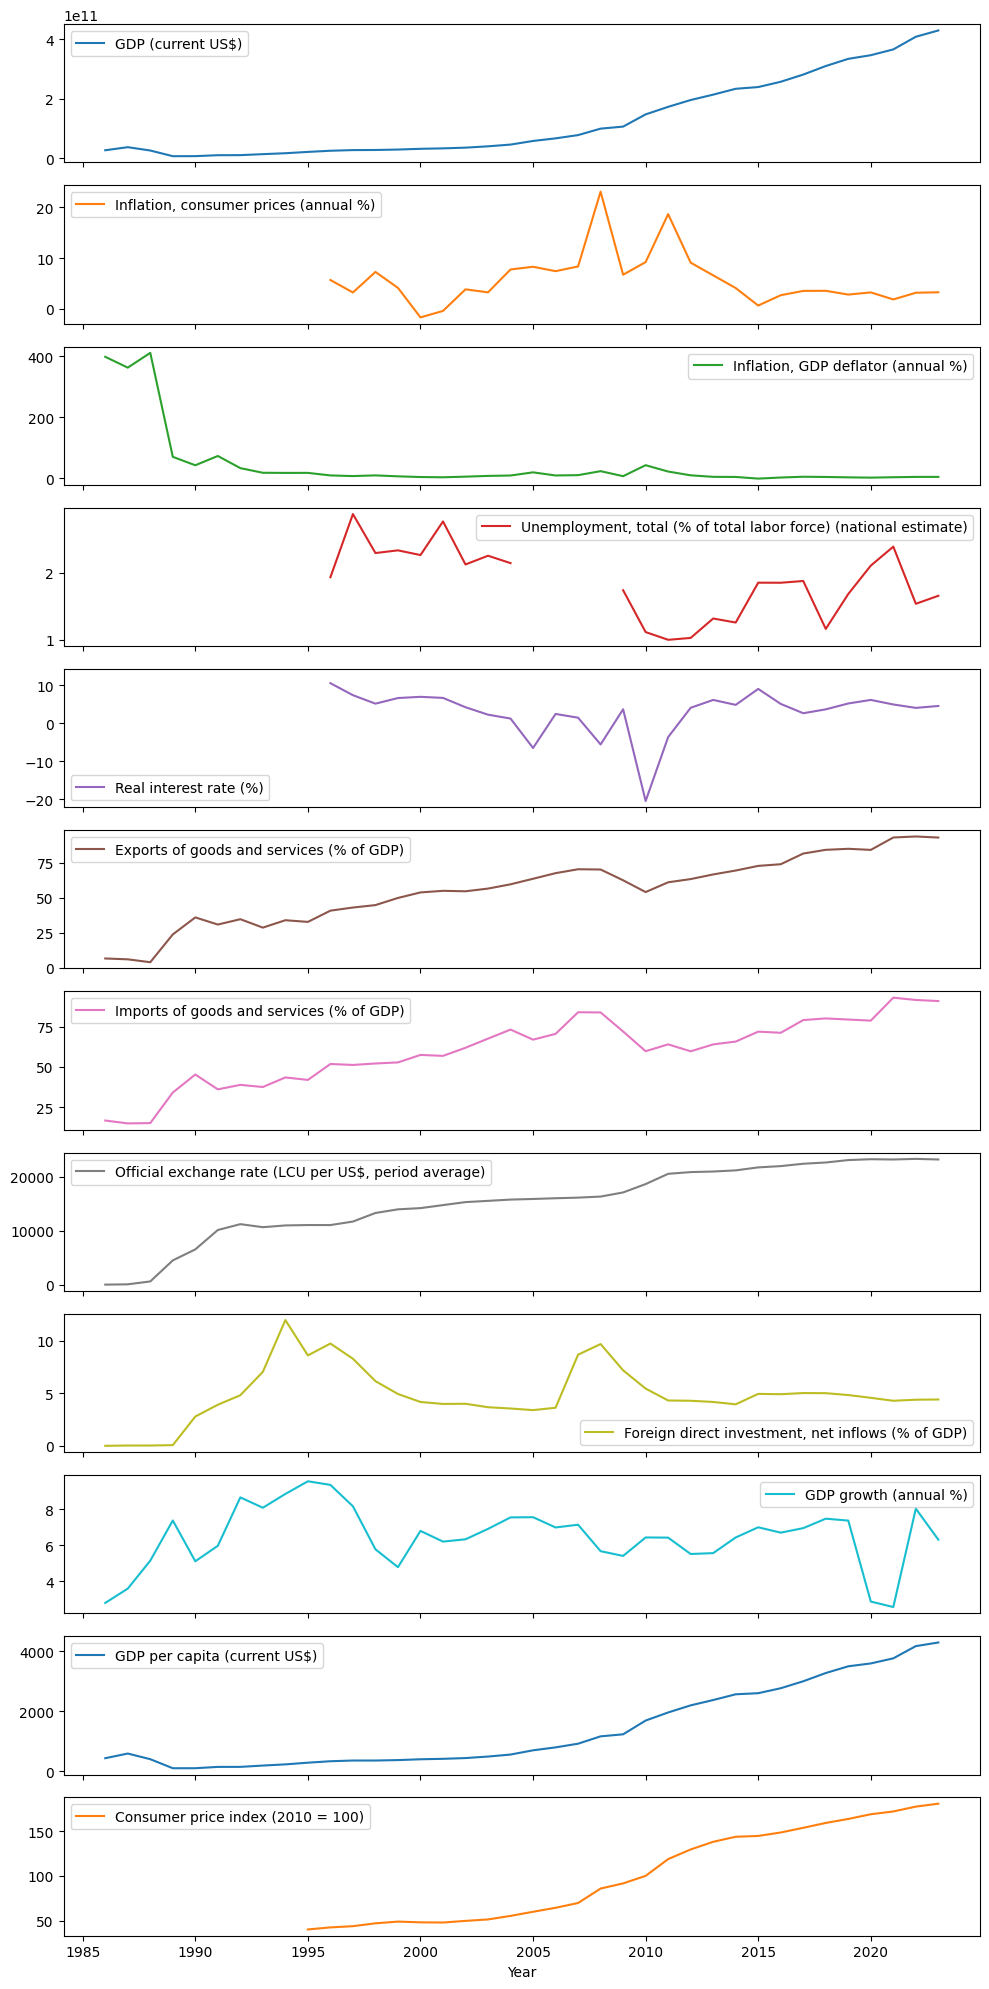

In [9]:
import matplotlib.pyplot as plt

# Check for missing values
print(data_cleaned.isna().sum())

# Summary statistics
print(data_cleaned.describe())

# Plot each numeric column
data_cleaned[numeric_columns].plot(subplots=True, figsize=(10, 20))
plt.tight_layout()
plt.show()
